# Dropout
- Regularize the Network -> Reduce Overfitting
- Prevent nodes from dying

### DropOut
- Randomly kill some nodes after each iteration
- In the next iteration, randomly kill some other nodes
<img src="Figs/19.jpg" alt="Drawing" style="width: 500px;"/>

- Add a probability p to each node in trainning (With testing or deploment remove p to ensure all nodes present)
<img src="Figs/20.jpg" alt="Drawing" style="width: 500px;"/>


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

display(X[5])
display(y[5])

display(X.shape)
display(y.shape)

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

5

(1797, 64)

(1797,)

5


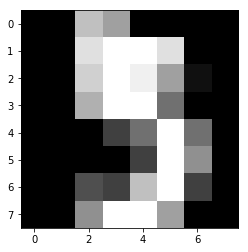

In [3]:
print(y[5])
plt.imshow(X.reshape(-1, 8, 8)[5], cmap='gray')

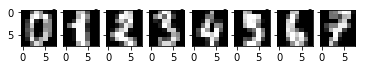

In [4]:
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(X.reshape(-1, 8, 8)[i], cmap='gray')

## Onehot Encoding y

In [5]:
from keras.utils import to_categorical

y_cat = to_categorical(y, 10)

print(y_cat.shape)

Using TensorFlow backend.


(1797, 10)


## Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat,
    test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(1257, 64)
(1257, 10)

(540, 64)
(540, 10)


## Model without Dropout

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()

model.add(Dense(512, input_shape=X_train.shape[1:],
                kernel_initializer='normal',
                kernel_regularizer='l2', 
                activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile('sgd',
              'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 38,410
Trainable params: 38,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [9]:
# Fit model
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=1, verbose=0,
    validation_split=0.25,
    callbacks=[early_stop])

Epoch 00018: early stopping


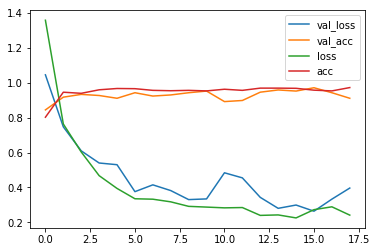

In [10]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

### Evaluate

In [11]:
result = model.evaluate(X_test, y_test)

display(result)
print('Accuracy: ' + str(result[1]*100.0) + ' %')

540/540 [==============================] - 0s 98us/step


[0.4289826755170469, 0.9148148161393624]

Accuracy: 91.48148161393624 %


## Model with Dropout

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K

K.clear_session()

model = Sequential()

model.add(Dropout(0.2, input_shape=X_train.shape[1:]))
model.add(Dense(512, 
                kernel_initializer='normal',
                kernel_regularizer='l2',
                activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile('sgd',
              'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 38,410
Trainable params: 38,410
Non-trainable params: 0
_________________________________________________________________


In [13]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)

In [14]:
# Fit model
history = model.fit(
    X_train, y_train,
    epochs=100, batch_size=1, verbose=0,
    validation_split=0.25,
    callbacks=[early_stop])

Epoch 00007: early stopping


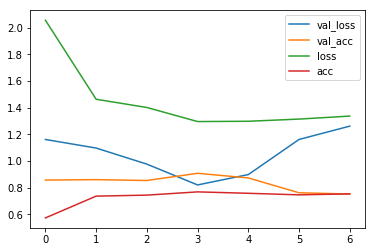

In [15]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

### Evaluate

In [16]:
result = model.evaluate(X_test, y_test)

display(result)
print('Accuracy: ' + str(result[1]*100.0) + ' %')

540/540 [==============================] - 0s 379us/step


[1.3102671093410916, 0.7351851856267011]

Accuracy: 73.51851856267011 %
